control +m d  하면 셀 살릴 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
def plot_result(history, ymin = None, ymax=None):
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)

    plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label ='train loss')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label ='validation loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin,ymax)
    plt.legend()

    
    plt.subplot(1,2,2)

    plt.plot(range(1,N_EPOCHS+1), history.history['accuracy'], label ='train accuracy')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_accuracy'], label ='validation accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin,ymax)
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# 하이퍼 파라미터 

LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100



1. layer dropout :rate -0.5 epoch, 지표 :loss, val_loss, acc , val_acc
2. layer 추가 :... dropout 제거 , bn 

- 이런식으로 성능을 계속 향상시켜 보기.. .


In [ ]:
#Data loading및 Dataset생성
(train_image, train_label),(test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape,test_image.shape  # 전처리 하려고 변수를 다른것으로 줌 





11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10

In [ ]:
X_train = train_image/255   # 전처리 하려고 변수를 다른것으로 줌 --> 여러번 실행되도 문제가 안생김... 
X_test = test_image/255

y_train= keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)  #ohe 함... 

In [ ]:
#데이터셋 만들기

train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder = True)\
                               .repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(N_BATCHS)



In [ ]:
steps_per_epoch = N_TRAIN //N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

# 모델크기 변경 했을때 

In [ ]:
# 작은 모델 -> layer층, units수가 적은 것.
def create_model():
    model = keras.Sequential()
    # Input layers
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # 히든 layers
    model.add(keras.layers.Dense(8, activation ='relu'))
    # 출력 layers
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate= LEARNING_RATE),
                  loss = 'categorical_crossentropy',
                  metrics =['accuracy'])
    
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


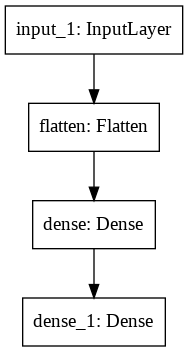

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
# 학습 
history = model.fit(train_dataset,
                      epochs = N_EPOCHS,
                      steps_per_epoch = steps_per_epoch,
                      validation_data = val_dataset,
                      validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 5s 3ms/step - loss: 1.3855 - accuracy: 0.5793 - val_loss: 0.4234 - val_accuracy: 0.8837
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4011 - accuracy: 0.8877 - val_loss: 0.3323 - val_accuracy: 0.9096
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3259 - accuracy: 0.9069 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3025 - accuracy: 0.9154 - val_loss: 0.2922 - val_accuracy: 0.9191
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.9201 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.9208 - val_loss: 0.2761 - val_accuracy: 0.9239
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2704 - accuracy: 0.9244 - val_loss: 0.2732 - val_accuracy: 0.9239
Epoch 

## 작은모델(단순한 모델) 결론
- fit되는 속도는 빠르지만 패턴을 찾아내거나 로스율,정확도를 높이는 데는 느리다.
- 작은 모델이라서 accuracy 를 보면 train_accuracy도 성능이 더디게 올라가고 validationaccuracy는 성능이 정체되...
- 마찬가지로 train loss, validation loss 의 로스율도 줄어드는게 더디다.. --> 밑에 큰 모델과 비교했을때
- 즉, train,val 둘다 성능이 좋게 나오지 않는다.---> 과소적합(underfitting)

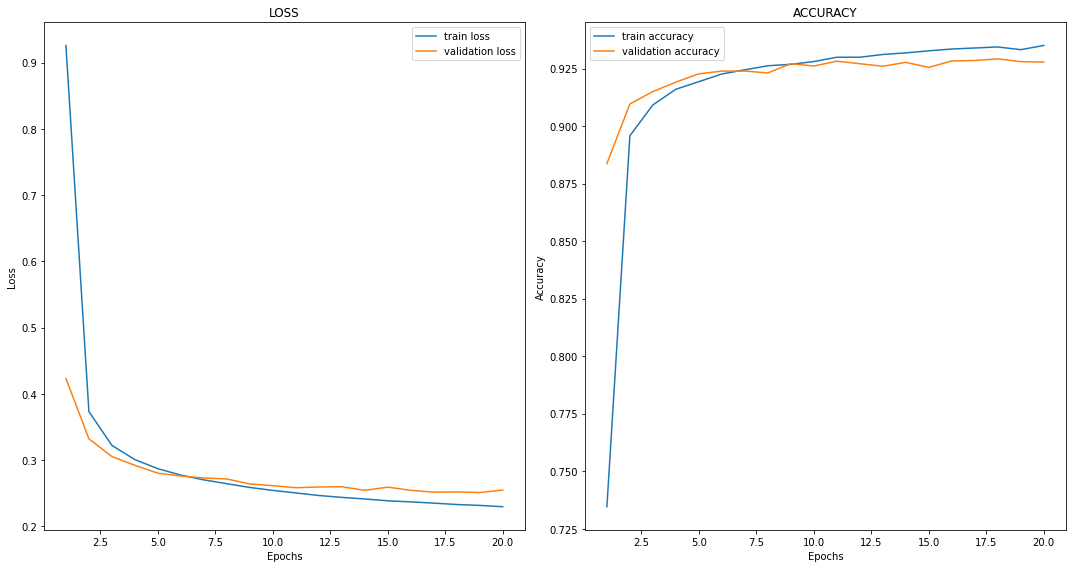

In [ ]:
plot_result(history)
# 가중치(W)가 랜덤하게 들어가는데 그 가중치가 성능을 조금 안좋게하는? 가중치가 잡혔기때문에 강사님이랑 다름..

# 큰모델

In [ ]:
# # 하이퍼 파라미터 

# LEARNING_RATE = 0.001
# N_EPOCHS = 10
# N_BATCHS = 100


In [ ]:
# 큰모델  유닛, 레이어 수 증가 --> 연습할때 레이어 유닛 바꿔보기 
# 학습속도 느려짐... 
def create_model():
    model = keras.Sequential()
    # Input layers
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # 히든 layers  // layer늘려보기
    
    model.add(keras.layers.Dense(256, activation ='relu'))
    model.add(keras.layers.Dense(256, activation ='relu'))
    model.add(keras.layers.Dense(128, activation ='relu'))
    model.add(keras.layers.Dense(128, activation ='relu'))
    
    # 출력 layers
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate= LEARNING_RATE),
                  loss = 'categorical_crossentropy',
                  metrics =['accuracy'])
    
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [ ]:
# 학습
history = model.fit(train_dataset,
                      epochs = N_EPOCHS,
                      steps_per_epoch = steps_per_epoch,
                      validation_data = val_dataset,
                      validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4751 - accuracy: 0.8581 - val_loss: 0.1105 - val_accuracy: 0.9645
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0999 - accuracy: 0.9699 - val_loss: 0.0864 - val_accuracy: 0.9718
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0618 - accuracy: 0.9808 - val_loss: 0.0769 - val_accuracy: 0.9761
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0764 - val_accuracy: 0.9779
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0783 - val_accuracy: 0.9779
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0847 - val_accuracy: 0.9768
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0854 - val_accuracy: 0.9801
Epoch 

In [ ]:
model.evaluate(val_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9819


[0.08553715795278549, 0.9818999767303467]

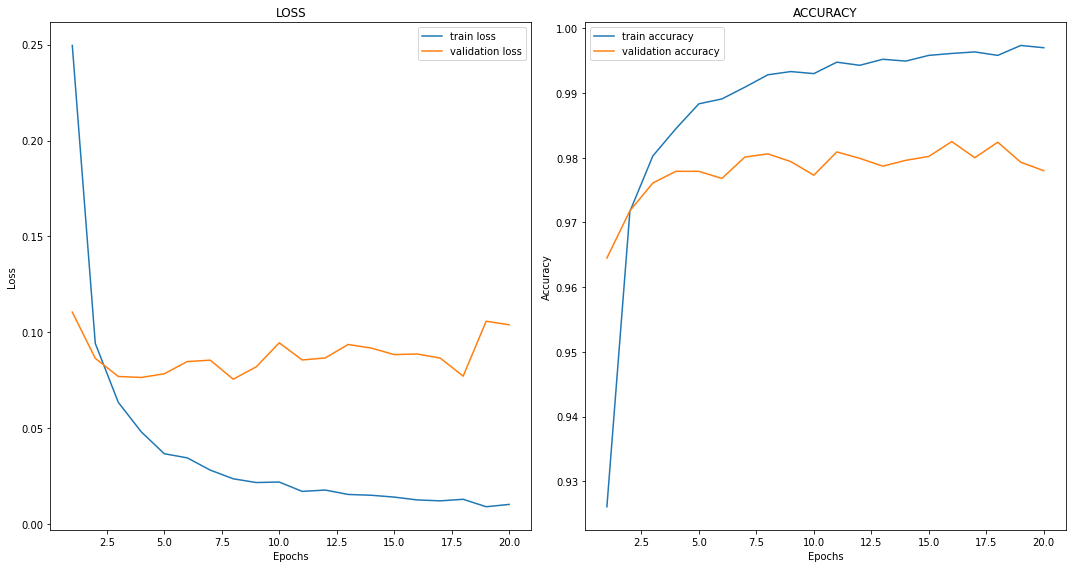

In [ ]:
# def create_model():
#     model = keras.Sequential()
#     # Input layers
#     model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
#     model.add(keras.layers.Flatten())
#     # 히든 layers  // layer늘려보기
#     model.add(keras.layers.Dense(256, activation ='relu'))
#     model.add(keras.layers.Dense(256, activation ='relu'))
#     model.add(keras.layers.Dense(128, activation ='relu'))
#     model.add(keras.layers.Dense(128, activation ='relu'))
#     # 출력 layers
#     model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
#     model.compile(optimizer = keras.optimizers.Adam(learning_rate= LEARNING_RATE),
#                   loss = 'categorical_crossentropy',
#                   metrics =['accuracy'])
    
#     return model  ---> 이모델일때 accuracy, loss율.. 그래프.. 

plot_result(history)  # 큰모델이라서 처음부터 높은 성능을 발휘

In [ ]:
plot_result(history)

# Dropout 적용

- dropout layer는 적용하려는 layer앞에 추가한다.
- dropout 비율은 0 ~ 1사이 실수로 지정하는데 보통 0.2 ~ 0.5값을 지정한다.
- dropout이 적용된 모델을 학습시킬때는 epoch수를 더 늘려준다. 
- 학습시 일부 unit을 drop 한다.

In [ ]:
DROPOUT_RATE = 0.5  # 한 epoch당 비율,,
def create_dropout_model():
    model = keras.Sequential()
    # Input layers
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    # Hidden layers  
    model.add(keras.layers.Dropout(rate= DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation ='relu'))

    model.add(keras.layers.Dropout(rate= DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation ='relu'))

    model.add(keras.layers.Dropout(rate= DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation ='relu'))

    model.add(keras.layers.Dropout(rate= DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation ='relu'))
    
    # Output layers // 실제 드랍아웃이 되는 것은 연결되어 있는 가중치를 드랍시킨다고 생각하면 된다. 드랍 아웃된 가중치가 없이 학습되는것.. 
    model.add(keras.layers.Dropout(rate= DROPOUT_RATE))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # 컴파일 
    model.compile(optimizer = keras.optimizers.Adam(learning_rate= LEARNING_RATE),
                  loss = 'categorical_crossentropy',
                  metrics =['accuracy'])
    
    return model

In [ ]:
model = create_dropout_model()  # 자동완성 : control+space
model.summary()  # dropout : 파라미터가 추가 되지는 않는다... Flatten 같이 기능적인 역할만... 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [ ]:
plot_model(model, show_shapes = True)  # 노드가 일을 안하게 한다...노드로 가는  W를 줄인다... 

NameError: ignored

In [ ]:
history = model.fit(train_dataset,
                     epochs = N_EPOCHS,
                     steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 1.6955 - accuracy: 0.3895 - val_loss: 0.3478 - val_accuracy: 0.9148
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.6120 - accuracy: 0.8224 - val_loss: 0.2312 - val_accuracy: 0.9371
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4674 - accuracy: 0.8709 - val_loss: 0.1878 - val_accuracy: 0.9471
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4095 - accuracy: 0.8871 - val_loss: 0.1662 - val_accuracy: 0.9544
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3733 - accuracy: 0.8982 - val_loss: 0.1505 - val_accuracy: 0.9567
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3523 - accuracy: 0.9045 - val_loss: 0.1447 - val_accuracy: 0.9578
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3267 - accuracy: 0.9119 - val_loss: 0.1305 - val_accuracy: 0.9637
Epoch 

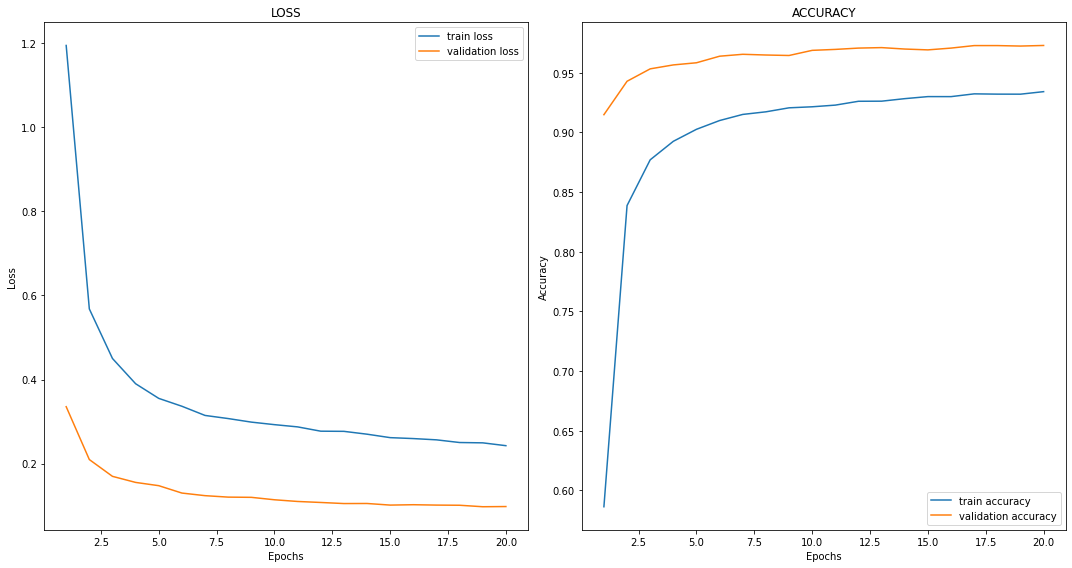

In [ ]:
plot_result(history)  # validation이 정확성이 높고 loss율도 낮다!!!!! // drop out 규제효과 : 일반화가 더 되었다/
# / 드랍아웃을 사용했으니까 epoch을 더 올려야한다... 아직 로스율이떨어지는 추세이라서..// 아님 드랍아웃레이트를 조정.. 
# 드랍아웃을 사용했으니까 epoch을 더 올려야한다 : 똑같은 횟수를 돌렸는데 valaccuracy가 조금 낫다..

In [ ]:
model.evaluate(val_dataset)  # 모델 성능 평가// 학습X --> 역전파 X ->가중치 update X --> dropout을 할 필요가 없다..(keras에서 알아서 설정해줌..)
# 드랍아웃 학습시에 w(가중치)/node 개수를 규제 하는 역할을 하는것이니까 
# 예측이나 평가는 학습한 모델 을 한번 지나가서 평가하면 끝나기 때문에 .. 드랍아웃을 할필요도 없고
# 학습할때만 드랍아웃이 작동하게 케라스에서 알아서 해줌.. 순전파만 이뤄지는 상황에서는 드랍아웃이 작동되지않는다. 

100/100 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9780


[0.10390413552522659, 0.9779999852180481]

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
pred_dataset =X_test[:5] # 새로운 데이터라고 생각

In [ ]:
pred = model.predict(pred_dataset)  # 새로운 데이터 예측 
np.argmax(pred,axis = -1)

array([7, 2, 1, 0, 4])

In [ ]:
test_label[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Batch Normalization
- 각 layer에서 출력된 값을 평균 = 0 표준편차 =1로 정규화 하여 각 layer의 입력 분포를 균일하게 만들어 준다.
- 레이어를 통과 할때마다 입력 데이터 분포가 달라지는 현상(=내부공변량 변화)을 
레이어를 통과할때마다 정규화를 해서 성능을 올린다. 

In [ ]:
def create_BN_model():

    model = keras.Sequential()

    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    # HIdden
    model.add(keras.layers.Dense(256)) # Fully Connected Layer (Dense layer)
    model.add(keras.layers.BatchNormalization()) 
    model.add(keras.layers.ReLU())  #Activation Layer

    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dense(128)) # Fully Connected Layer (Dense layer)
    model.add(keras.layers.BatchNormalization()) 
    model.add(keras.layers.ReLU())  #Activation Layer
    
    model.add(keras.layers.Dense(128)) # Fully Connected Layer (Dense layer)
    model.add(keras.layers.BatchNormalization()) 
    model.add(keras.layers.ReLU())  #Activation Layer


# output 
    model.add(keras.layers.Dense(N_CLASS))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())  # keras.layers.Activation('sigmoid') sigmoid는 class지정이 안되있어서 이렇게 넣어줘야함..

    # compile
    model.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

    return model

In [ ]:
model = create_BN_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)              

In [ ]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 5s 5ms/step - loss: 0.5896 - accuracy: 0.8866 - val_loss: 0.1903 - val_accuracy: 0.9732
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1782 - accuracy: 0.9720 - val_loss: 0.1162 - val_accuracy: 0.9769
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1060 - accuracy: 0.9809 - val_loss: 0.0886 - val_accuracy: 0.9779
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0746 - accuracy: 0.9858 - val_loss: 0.0837 - val_accuracy: 0.9783
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0561 - accuracy: 0.9884 - val_loss: 0.0783 - val_accuracy: 0.9780
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0461 - accuracy: 0.9897 - val_loss: 0.0744 - val_accuracy: 0.9784
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0403 - accuracy: 0.9905 - val_loss: 0.0700 - val_accuracy: 0.9797
Epoch 

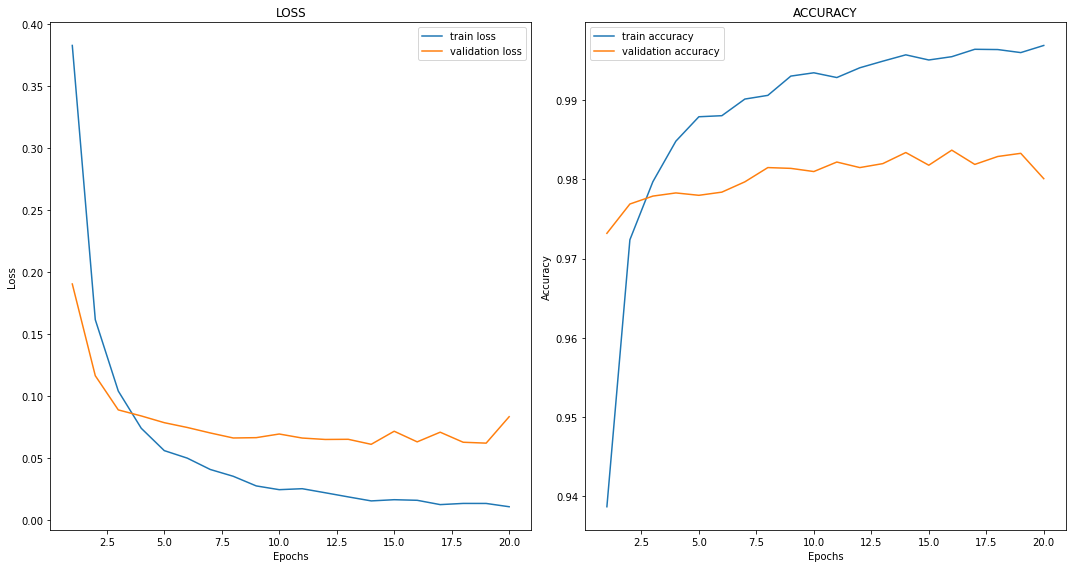

In [ ]:
plot_result(history)

In [ ]:
#학습률 조절

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 30

def create_model():
    model = keras.Sequential()

    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(256, activation= 'relu'))
    model.add(keras.layers.Dense(128, activation= 'relu'))
    model.add(keras.layers.Dense(128, activation= 'relu'))

    model.add(keras.layers.Dense(N_CLASS, activation= 'softmax'))
  # 컴파일 안함.. 
    return model

## ExponentialDecay 를 사용
 - 일정한 step 마다 일정한 비율로 학습률을 변경(줄여준다.)
 - ExponentialDecay(파라미터설정한) 객체를 만들어서 modelcompile에 learning_rate = 객체  로 넣어줌  사용
 

In [ ]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                            initial_learning_rate = LEARNING_RATE,  #시작 학습률
                            decay_steps = steps_per_epoch*10, # 몇 step 마다 학습률을 변경시킬 것인지 (에폭 아님..~~~!!!!!)/
                            # 스텝 기준인데 에폭기준으로 바꾼것임.. 원래는 스텝 단위임 // 원래는 숫자로 그냥 넣는데 에폭단위로 하기때문에계산함
                            decay_rate = 0.5, # 학습률의 변화율, 기존학습률 *(곱하기) 지정한값. // 학습률 줄어듦 10 에폭마다 
                            staircase = True, # True : 한번에 변경, False: 매스텝마다 조금씩 변화 / True :계단식,  
) # optimizer의 학습률대신 lr_scheduler를 설정..

In [ ]:
 # steps_per_epoch*10  -->10 에폭 마다 학습률 바꾼다.

In [ ]:
model = create_model()


In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate = lr_scheduler), #lr_scheduler 설정한 대로 learning_rate를 바꾼다.
               loss = 'categorical_crossentropy',
               metrics =['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

# 10에폭 단위로 loss, accuracy 확인해보기.. 

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4725 - accuracy: 0.8636 - val_loss: 0.1178 - val_accuracy: 0.9635
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0992 - accuracy: 0.9695 - val_loss: 0.0874 - val_accuracy: 0.9725
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0762 - val_accuracy: 0.9757
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.0778 - val_accuracy: 0.9752
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0710 - val_accuracy: 0.9803
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0946 - val_accuracy: 0.9744
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0934 - val_accuracy: 0.9753
Epoch 

# LearningRate 조정과 관련 callback 사용.

- Callback : 학습 도중 특정 이벤트(변화)가 발생하면 호출되는 기능.
-  Callback은 fit할때 적용.

## RecuceLROnPlateau callback 
- patience 에폭 동안 monitor에 지정한 지표가 향상되지 않으면 현재 learning_rate에 factor(0~ 1 실수)를 곱해서 learning rate를 조정한다.

In [ ]:
model = create_model()
model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# ReduceLRnPlateau callback 생성
rlp_callback = keras.callbacks.ReduceLROnPlateau(patience= 10, # 10 에폭 동안 기다렸다가
                                                 monitor = 'val_loss', # validation loss의 지표가 향상되지(좋아지지) 않으면// loss가 줄어들지않으면
                                                 factor = 0.5, # 현재 학습률에 0.5 곱한것을 새 학습률로 조정해라.
                                                 verbose = 1 )# 학습률이 바뀌면 로그를 출력-->학습률바뀔때마다 학습률 보여줌...

                                                 # 언제 이슈가 발생할지모르니까 callback을 쓴다... ^^

# Callback은 fit할때 적용.
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps,
                    callbacks = [rlp_callback])  # 리스트로 줘야하고 ,, 여러 콜백을 한번에 적용할 수도 있기 때문..

# 로스가 계속 좋아지다가 일정순간 좋아지지 않았는데 10epoch동안 좋아지지 않으면 callback 중간에 좋아지면 거기서부터 다시 10번
# 콜백에 설정한 조건을 보고 결과를 봐보자 // 로그가 출력된데를 보고 그위로 loss율을  찾아보자.

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4763 - accuracy: 0.8562 - val_loss: 0.1140 - val_accuracy: 0.9632
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0991 - accuracy: 0.9711 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0617 - accuracy: 0.9805 - val_loss: 0.0829 - val_accuracy: 0.9757
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0970 - val_accuracy: 0.9698
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0697 - val_accuracy: 0.9796
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0686 - val_accuracy: 0.9826
Epoch 

## LearningRateScheduler callback 사용
- 사용자 정의 학습률 조정함수를 만들어 적용.
- 학습률 조정하는 함수를 만들어서 callback 생성시 등록
 - 매개변수 
    1.epoch
    2.현시점 learning rate
 - 반환값 
    - 조정한 learning rate

In [ ]:
def user_lr(epoch, lr):  # 에폭마다 계속 실행됨.. 
    if epoch < 5 :  #1~5 까지 
        return lr
    elif epoch <10 :
        if epoch ==6:
            print('==========================Change Learning Rate: ', lr*0.5, 'Epochs : ', epoch)
        return lr * 0.5
    elif epoch <20 :
        if epoch ==11:
            print('==========================Change Learning Rate: ', lr*0.5, 'Epochs : ', epoch)
        return lr * 0.5
    else:
        return lr     

In [ ]:
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(user_lr)

model = create_model()
model.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs = N_EPOCHS, 
          steps_per_epoch = steps_per_epoch,
          validation_data = val_dataset,
          validation_steps = validation_steps,
          callbacks =[lr_scheduler_callback])

# 로스가 안바뀌는 것은 러닝 레이트가 0에 가까워지는것.. 

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4819 - accuracy: 0.8612 - val_loss: 0.1231 - val_accuracy: 0.9594
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1031 - accuracy: 0.9681 - val_loss: 0.0890 - val_accuracy: 0.9733
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0696 - val_accuracy: 0.9780
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0735 - val_accuracy: 0.9784
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0752 - val_accuracy: 0.9775
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0646 - val_accuracy: 0.9812
Epoch 7/30
==========================Change Learning Rate:  0.0002500000118743628
600/600 [==============================] - 3s 4ms/step - loss: 0.0